# Chapter 3 Problem 9

## a.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
df = pd.DataFrame(pd.read_csv('data/auto.csv'))
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


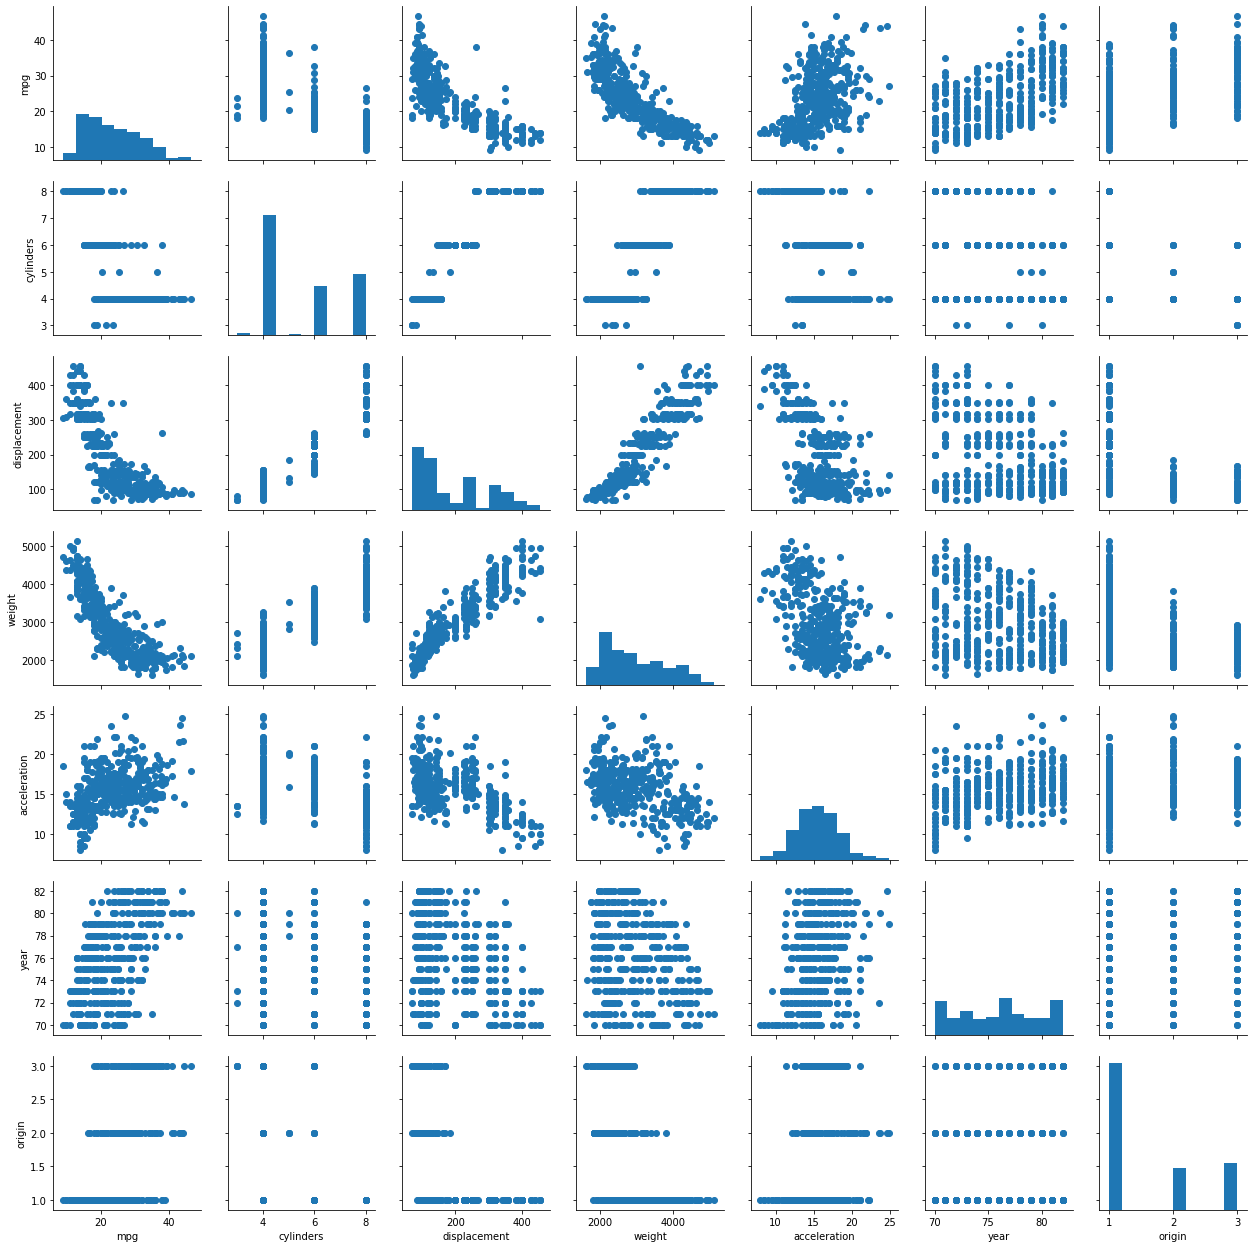

In [18]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)
g.map_diag(plt.hist)

## b.

In [21]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


## c.

In [50]:
df['horsepower'].head()
df['horsepower'].unique()
drop_list = df[df['horsepower'] == '?'].index
df = df.drop(drop_list)


In [51]:

model = smf.ols('mpg ~ cylinders + displacement+ horsepower +weight + acceleration + year + origin',data = df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          2.04e-139
Time:                        18:28:23   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## i.

Yes, there is a relationship between the predictors and the repsonse. The f-statistic is 252.4. Which is much larger than 1. Therefore, we can reject the null hypothesis.

## ii.

displacement, weight, year, and origin are all significant.

## iii.

The ccoefficient for the year variable suggests that, on average, when other variables are held constant, each additional year corresponds to an increase of 0.75 mpg.